In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp
from scipy import signal
from scipy.fftpack import fft

import pandas as pd
import os

In [2]:
# pwd
# var = pd.read_csv(r"/Users/utkarshtripathi/Documents/PlatformIO/Projects/test.csv")
# var.head() #check starting lines of dataset

# Part-1: Analyzing simulated EMG signal
- Create a simulated signal 
- Use baseline offset correction and check results
- Fourier Transform example for sine wave
- FFT for simulated signal
- Use butterworth filter on signal
- Analyze fourier transform of filtered signal

In [3]:
# simulated EMG signal [emg1: with offset and emg2: without offset]
burst1 = np.random.uniform(-1, 1, size=500) + 0.08 # 800 samples between -1 and +1 Volts
burst2 = np.random.uniform(-1, 1, size=500) + 0.08
quiet = np.random.uniform(-0.05, 0.05, size=500) + 0.08

burst1x = np.random.uniform(-1, 1, size=500) # 800 samples between -1 and +1 Volts
burst2x = np.random.uniform(-1, 1, size=500)
quietx = np.random.uniform(-0.05, 0.05, size=500)

emg1 = np.concatenate([quiet, burst1, quiet, burst2, quiet])
emg2 = np.concatenate([quietx, burst1x, quietx, burst2x, quietx])

time = np.array([i/1000 for i in range(0, len(emg1), 1)]) # sampling rate 1000 Hz
# generate a **list** of integer values ranging from 0 to the length of the variable emg


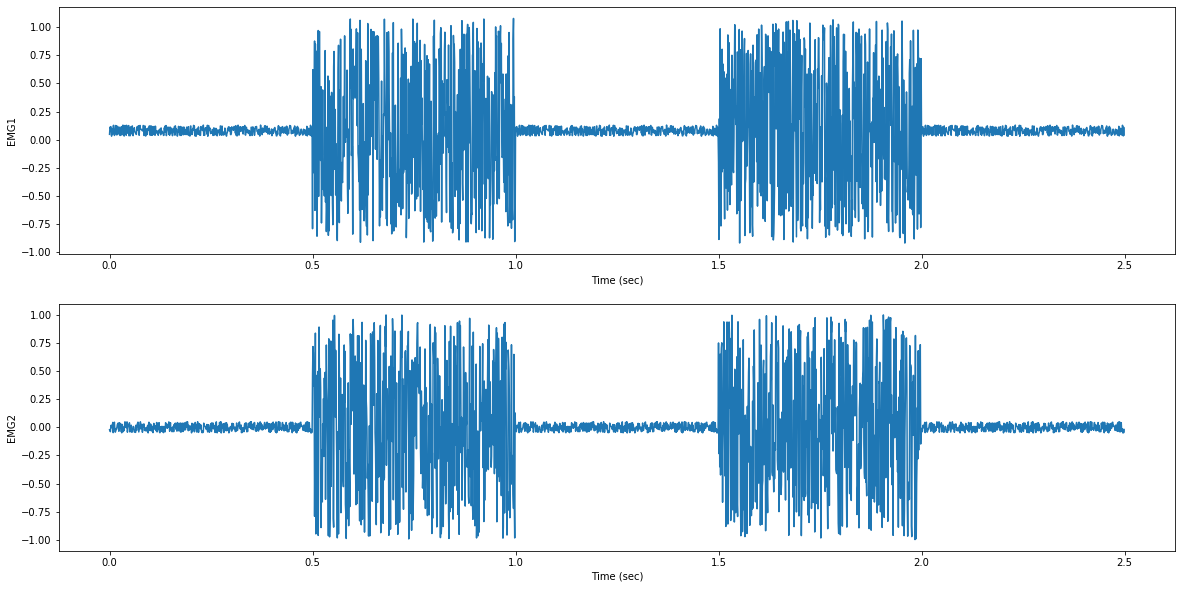

In [4]:
# plot EMG1 signal
fig = plt.figure()

plt.subplot(2,1,1)
plt.plot(time, emg1)
plt.xlabel('Time (sec)')
plt.ylabel('EMG1')

plt.subplot(2,1,2)
plt.plot(time, emg2)
plt.xlabel('Time (sec)')
plt.ylabel('EMG2')

fig.set_size_inches(w=20,h=10)
# fig.savefig('emg2.png')


In [5]:
# Baseline offset is not zero, solving:
# %whos # for checking variables
print ('Mean for first simulated emg signal' , np.mean(emg1))
print ('Mean for second simulated emg signal' , np.mean(emg2))

Mean for first simulated emg signal 0.08093181878254743
Mean for second simulated emg signal 0.000142768310345312


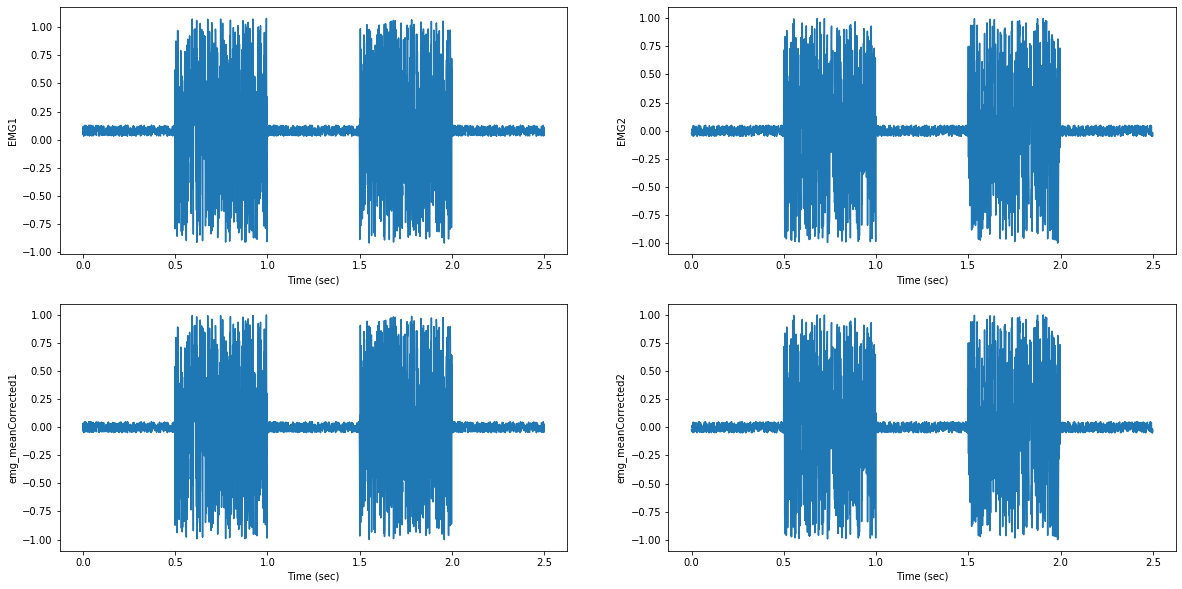

In [6]:
## Mean corrections [emg1: with offset and emg2: without offset]
emg_meanCorrected1 = emg1 - np.mean(emg1)
emg_meanCorrected2 = emg2 - np.mean(emg2)

# plot EMG1 signal
fig = plt.figure()

plt.subplot(2,2,1)
plt.plot(time, emg1)
plt.xlabel('Time (sec)')
plt.ylabel('EMG1')

plt.subplot(2,2,2)
plt.plot(time, emg2)
plt.xlabel('Time (sec)')
plt.ylabel('EMG2')

plt.subplot(2,2,3)
plt.plot(time, emg_meanCorrected1)
plt.xlabel('Time (sec)')
plt.ylabel('emg_meanCorrected1')

plt.subplot(2,2,4)
plt.plot(time, emg_meanCorrected2)
plt.xlabel('Time (sec)')
plt.ylabel('emg_meanCorrected2')

fig.set_size_inches(w=20,h=10)

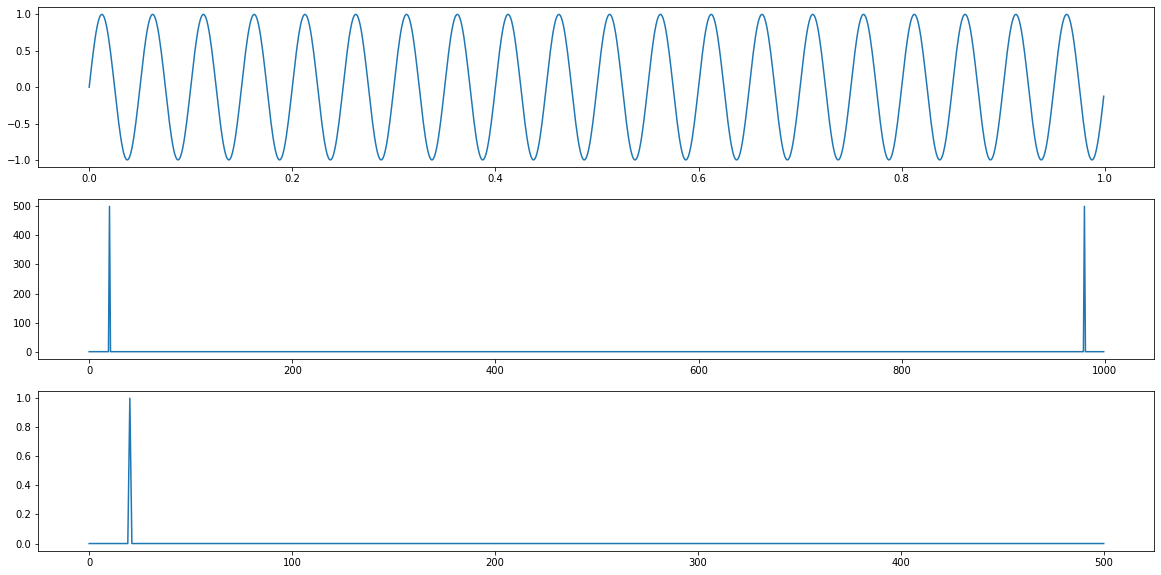

In [36]:
### Python fft testing with only sine wave to create the right fft

Fs = 1000 # Sampling frequency
sineFreq = 20
# t = np.linspace(0, 2, 100)
tx = np.arange(start=0, stop=1, step=1/Fs) # step == dt

# print(t)
# print(tx)

x = np.sin(2*np.pi*sineFreq * tx)
X = fft(x)

# Plot sine wave
fig = plt.figure()

plt.subplot(3,1,1)
plt.plot (tx,x)

plt.subplot(3,1,2)
plt.plot (abs(X)) # incorrect plot

## Frequency axis creation
n = np.size(tx)
freq_axis = (Fs/2) * np.linspace (0,1,n/2) # frequency axis: 0->500 Hz and generate half spectrum
X_corrected = abs( X[0:np.size(freq_axis)] ) * (2/n)

plt.subplot(3,1,3)
plt.plot (freq_axis,X_corrected) # Correct plot
fig.set_size_inches(w=20,h=10)


[0.000e+00 1.000e-03 2.000e-03 ... 2.497e+00 2.498e+00 2.499e+00] 2500


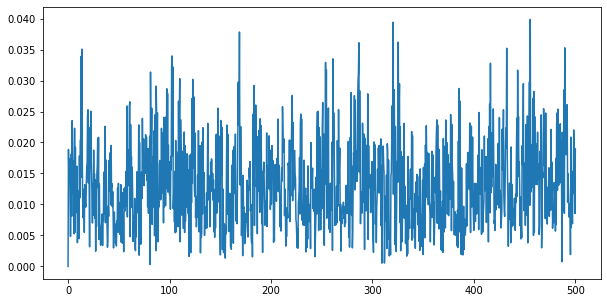

In [8]:
## Fourier transform on EMG signals. NOTE:
# emg1: with offset and emg2: without offset
# emg_meanCorrected1 emg_meanCorrected2
# FFT_emg_normalized => FT of emg_meanCorrected1

Fs_emg = 1000 # Sampling frequency (see first block)
print(time, np.size(time))

FFT_emg = fft(emg_meanCorrected1)

## Frequency axis creation
n_emg = np.size(time)
freq_axis_emg = (Fs/2) * np.linspace (0,1,n_emg/2) # frequency axis: 0->500 Hz and generate half spectrum
FFT_emg_normalized = abs( FFT_emg[0:np.size(freq_axis_emg)] ) * (2/n_emg)

fig = plt.figure()
plt.plot (freq_axis_emg,FFT_emg_normalized)
fig.set_size_inches(w=10,h=5)

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


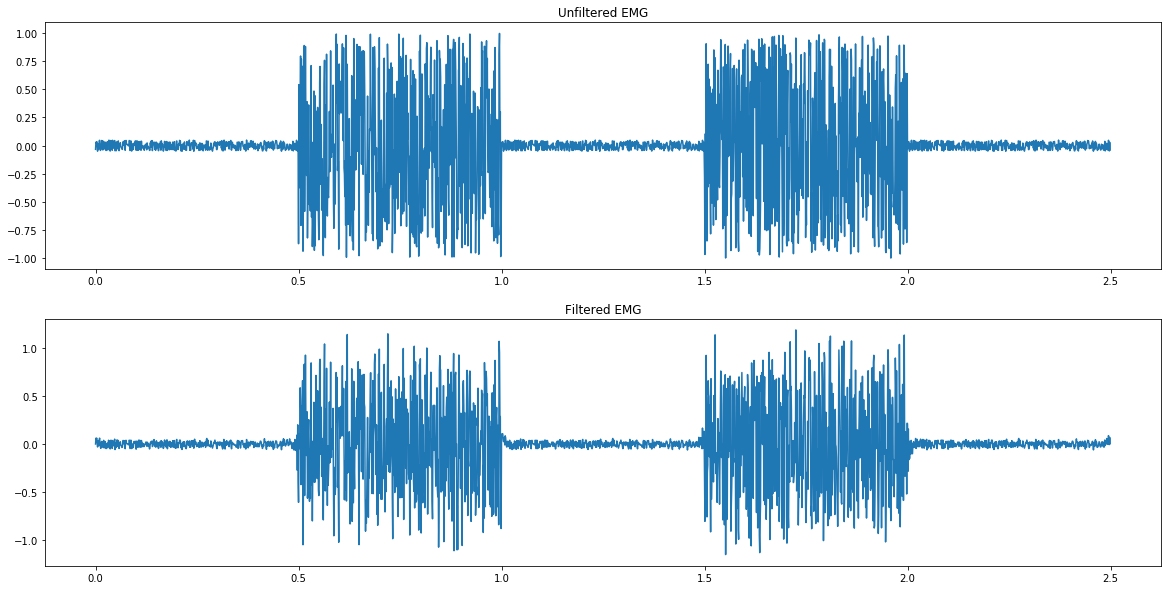

In [9]:
## BANDPASS FILTERING
## Comparison of ---FFT_emg_normalized--- and ---FFT_emg_filtered_normalized---

# Slow oscillations in the EMG signal -> movement artefacts 
# Fast oscillations -> unwanted electrical noise
# Add bandpass filter to avoid both (20-450 Hz) :

high = 20/(Fs/2)
low = 450/(Fs/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# Process EMG signal: filter EMG
emg_filtered = sp.signal.filtfilt(b, a, emg_meanCorrected1)

# "TIME DOMAIN" plot comparison of unfiltered and filtered EMG
fig = plt.figure()
fig.set_size_inches(w=11,h=7)

plt.subplot(2, 1, 1)
plt.subplot(2, 1, 1).set_title('Unfiltered EMG')
plt.plot(time, emg_meanCorrected1)

plt.subplot(2, 1, 2)
plt.subplot(2, 1, 2).set_title('Filtered EMG')
plt.plot(time, emg_filtered)
fig.set_size_inches(w=20,h=10)



/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


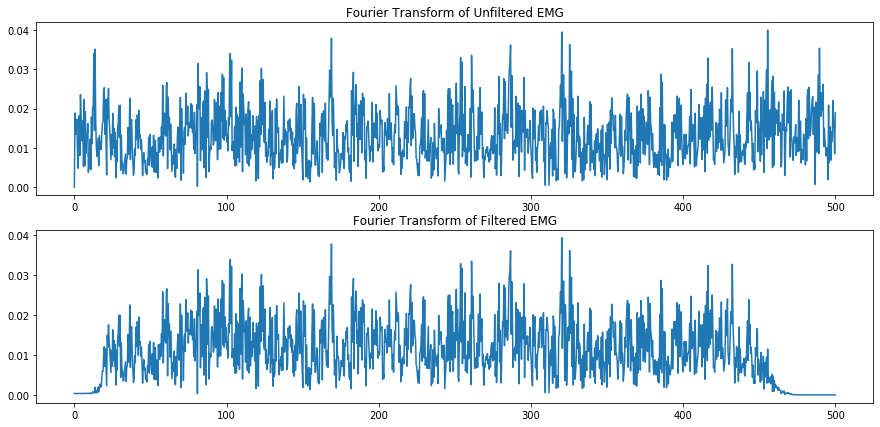

In [10]:
# FFT_emg_normalized => FT of emg_meanCorrected1
# FFT_emg_filtred_normalized => FT of emg_filtered

FFT_emg_filtered = fft(emg_filtered)
FFT_emg_filtered_normalized = abs( FFT_emg_filtered[0:np.size(freq_axis_emg)] ) * (2/n_emg)

# "FREQUENCY DOMAIN" plot comparison of unfiltered and filtered EMG
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.subplot(2, 1, 1).set_title('Fourier Transform of Unfiltered EMG')
plt.plot(freq_axis_emg, FFT_emg_normalized)

plt.subplot(2, 1, 2)
plt.subplot(2, 1, 2).set_title('Fourier Transform of Filtered EMG')
plt.plot(freq_axis_emg, FFT_emg_filtered_normalized)

fig.set_size_inches(w=15,h=7)


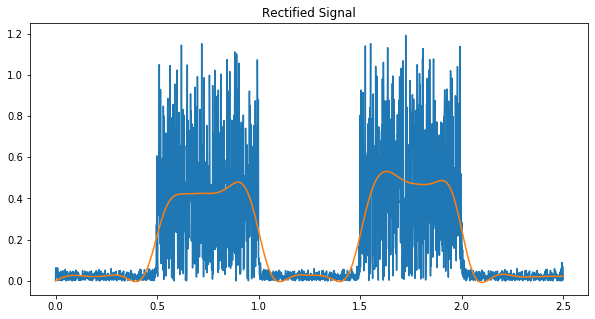

In [11]:
## Rectification of signal - take abs
RECT_emg_filtered = abs (emg_filtered)
fig = plt.figure()
fig.set_size_inches(w=10,h=5)
plt.title('Rectified Signal')
plt.plot(time, RECT_emg_filtered)

low_pass = 10
low_pass = low_pass/Fs
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
emg_envelope = sp.signal.filtfilt(b2, a2, RECT_emg_filtered)
plt.plot(time, emg_envelope)



<class 'numpy.ndarray'>
(2500,)


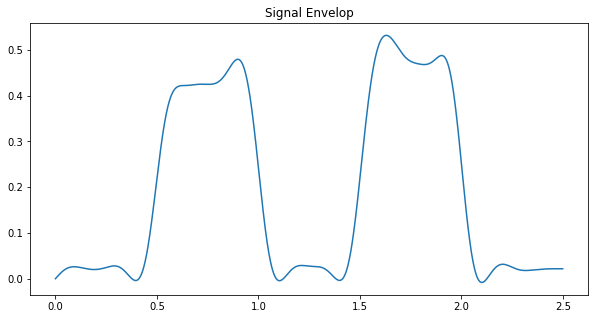

In [12]:
## EMG Envelop generation

# Use a low pass filter to capture the shape or “envelope” of the EMG signal -> 
# better reflects force generated by a muscle

low_pass = 10
low_pass = low_pass/Fs
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
emg_envelope = sp.signal.filtfilt(b2, a2, RECT_emg_filtered)
fig = plt.figure()
fig.set_size_inches(w=10,h=5)
plt.title('Signal Envelop')
plt.plot(time, emg_envelope)

print(type(emg_envelope))
print(np.shape(emg_envelope))

# Part-2: Stochastic Signal Analysis and Machine Learning Classification

- Fourier analysis can be used to decompose this signal in its periodic components. Fourier analysis tells us at what the frequency of these periodical component are.
- Defining function to quickly calculate fft as and when required

### Power Spectral Density and Auto-correlation
PSD:
- Frequency distribution + Power distribution at each frequency
- The surface below the peaks corresponds with the power distribution at that frequency.

Autocorrelation:
- correlation of a signal with a time-delayed version of itself
- if a signal contain a pattern which repeats itself after a time-period of \tau seconds, there will be a high correlation between the signal and a \tau sec delayed version of the signal.



In [13]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

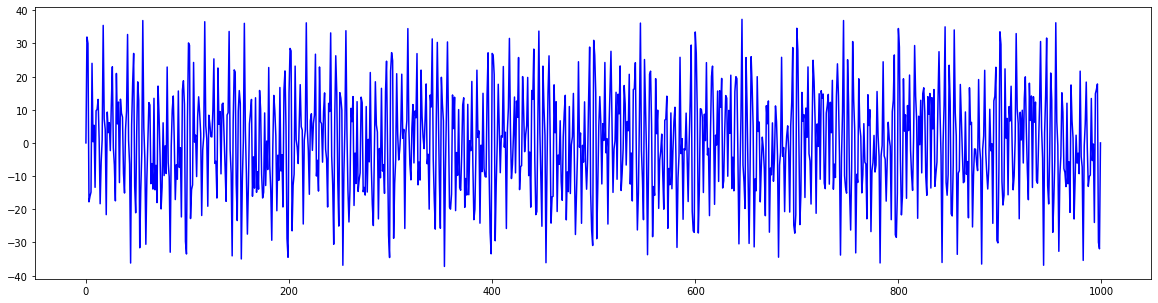

In [14]:
from scipy.signal import welch # for PSD

t_n = 10
N = 1000
T = t_n / N
f_s = 1/T

x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14, 10]
frequencies = [1, 24, 13, 18, 20, 54]
y_values = [amplitudes[ii] * np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

# print(y_values)gt

# Use the function defined above (makes use of Sci)
f_values_fft, fft_values = get_fft_values(composite_y_value, T, N, f_s) ## FFT
f_values_psd, psd_values = welch (composite_y_value, f_s) ## PSD

fig = plt.figure()
plt.plot(composite_y_value, color='blue')
fig.set_size_inches(w=20,h=5)

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


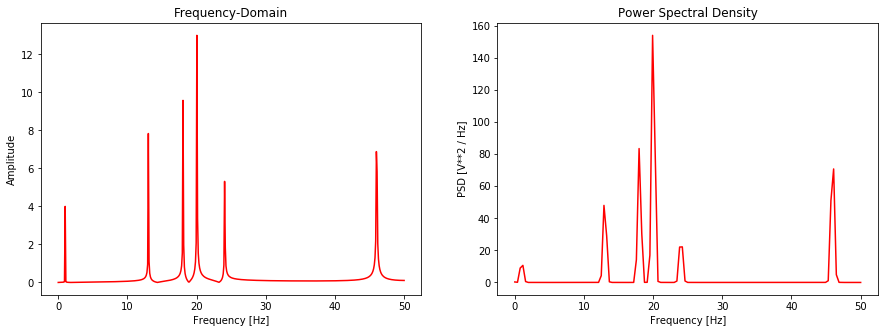

In [15]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Frequency-Domain')
plt.plot(f_values_fft, fft_values, linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') ##

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Power Spectral Density')
plt.plot(f_values_psd, psd_values, color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')

fig.set_size_inches(w=15,h=5)

In [16]:
# from autocorrelation import autocorr
# from autocorrelation import get_autocorr_values

def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


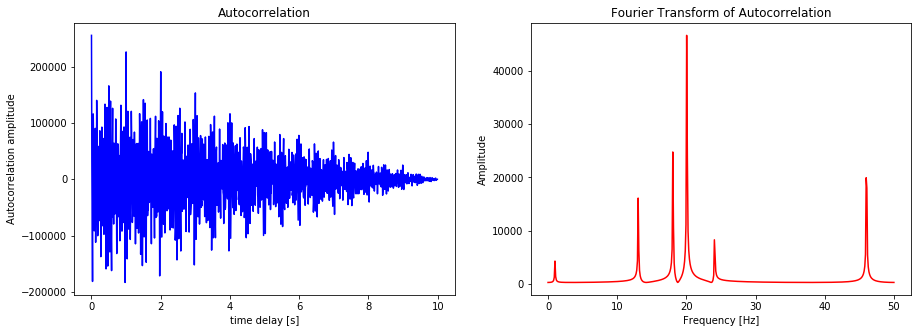

In [17]:
# Autocorrelation calculation
t_values, autocorr_values = get_autocorr_values(composite_y_value, T, N, f_s)

# Checking the FFT of autocorrelation calculated above (should be very similar to FFT of original signal)
f_values_ac, fft_values_ac = get_fft_values(autocorr_values, T, N, f_s) 

# Plot both autocorrelation and frequency domain
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Autocorrelation')
plt.plot(t_values, autocorr_values, linestyle='-', color='blue')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Fourier Transform of Autocorrelation')
plt.plot(f_values_ac, fft_values_ac, linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') ##

fig.set_size_inches(w=15,h=5)

Now extract features from each of these transformed signals (FFT, PSD and AutoCorrelation) and use these **features as input** in standard classifiers like Random Forest, Logistic Regression, Gradient Boosting or Support Vector Machines. One of these features is (peaks' frequency and amplitude) -> So need to find the peak first and find the corresponding frequency. 

#### FINDING PEAKS IN FREQUENCY DOMAIN

NOTE THE FOLLOWING: (https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/58888/versions/1/previews/Averaged_loop_example/fndpks.m/index.html)

* find only those peaks that are greater than MINPEAKHEIGHT MPH. Specifying a minimum peak height may help in reducing the processing time. MPH is a real valued scalar. The default value of MPH is -Inf.

* finds peaks that are at least separated by MINPEAKDISTANCE MPD. MPD is a positive integer valued scalar. This parameter may be specified to ignore smaller peaks that may occur in close proximity to a large local peak. For example, if a large local peak occurs at index N, then all smaller peaks in the range (N-MPD, N+MPD) are ignored. If not specified, MPD is assigned a value of one. 



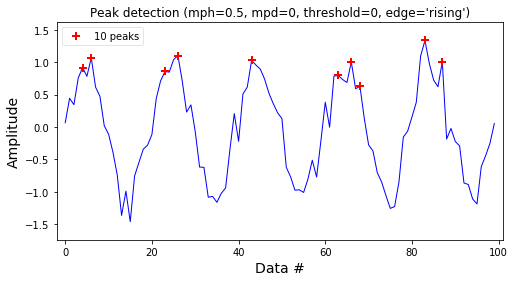

In [18]:
# %load detect_peaks.py
# function detect_peaks is present in the same folder as the notebook

from detect_peaks import detect_peaks 

x = np.sin(2*np.pi*5*np.linspace(0, 1, 100)) + (np.random.randn(100))/5
# set minimum peak height = 0.5 and minimum peak distance = 0
ind = detect_peaks(x, mph=0.5, mpd=0, show=True)

# x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
# # detection of valleys instead of peaks
# detect_peaks(x, mph=-1.2, mpd=20, valley=True, show=True)


In [19]:
## Finding Peaks in the FFT (calculated above) as one of the features

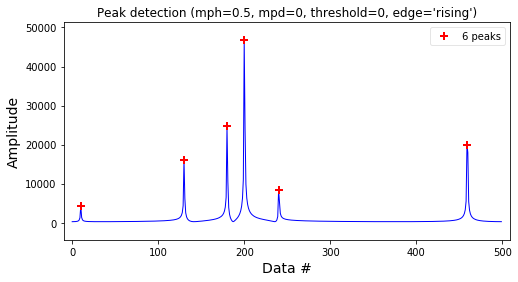

In [20]:

i2 = detect_peaks(fft_values_ac, mph=0.5, mpd=0, show=True)



---
---
---
---
---
---
---
---
---
---
---
---








# Analyzing Data Collected through EMG

---
---
---
---
---
---


In [21]:
# on off :  for data collected across Flexor Digitorum Superficialis
# on off 2: for data collected across Flexor Digitorum Superficialis (hard pressed)
# sec 10: for data collected across Flexor Digitorum Superficialis + 10secs open, 10secs closed

var_onoff = pd.read_csv(r"/Users/utkarshtripathi/Documents/PlatformIO/Projects/Data_Collected/onoff.csv")
var_onoff_2 = pd.read_csv(r"/Users/utkarshtripathi/Documents/PlatformIO/Projects/Data_Collected/onoff2.csv")
var_sec10 = pd.read_csv(r"/Users/utkarshtripathi/Documents/PlatformIO/Projects/Data_Collected/sec10.csv")
print (np.size(var_onoff), type(var_onoff))
print (np.size(var_onoff_2), type(var_onoff_2))
print (np.size(var_sec10), type(var_sec10))

# var.head() # check starting lines of dataset

9004 <class 'pandas.core.frame.DataFrame'>
6604 <class 'pandas.core.frame.DataFrame'>
13281 <class 'pandas.core.frame.DataFrame'>


## Plotting data collected through MyoWare

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an ax

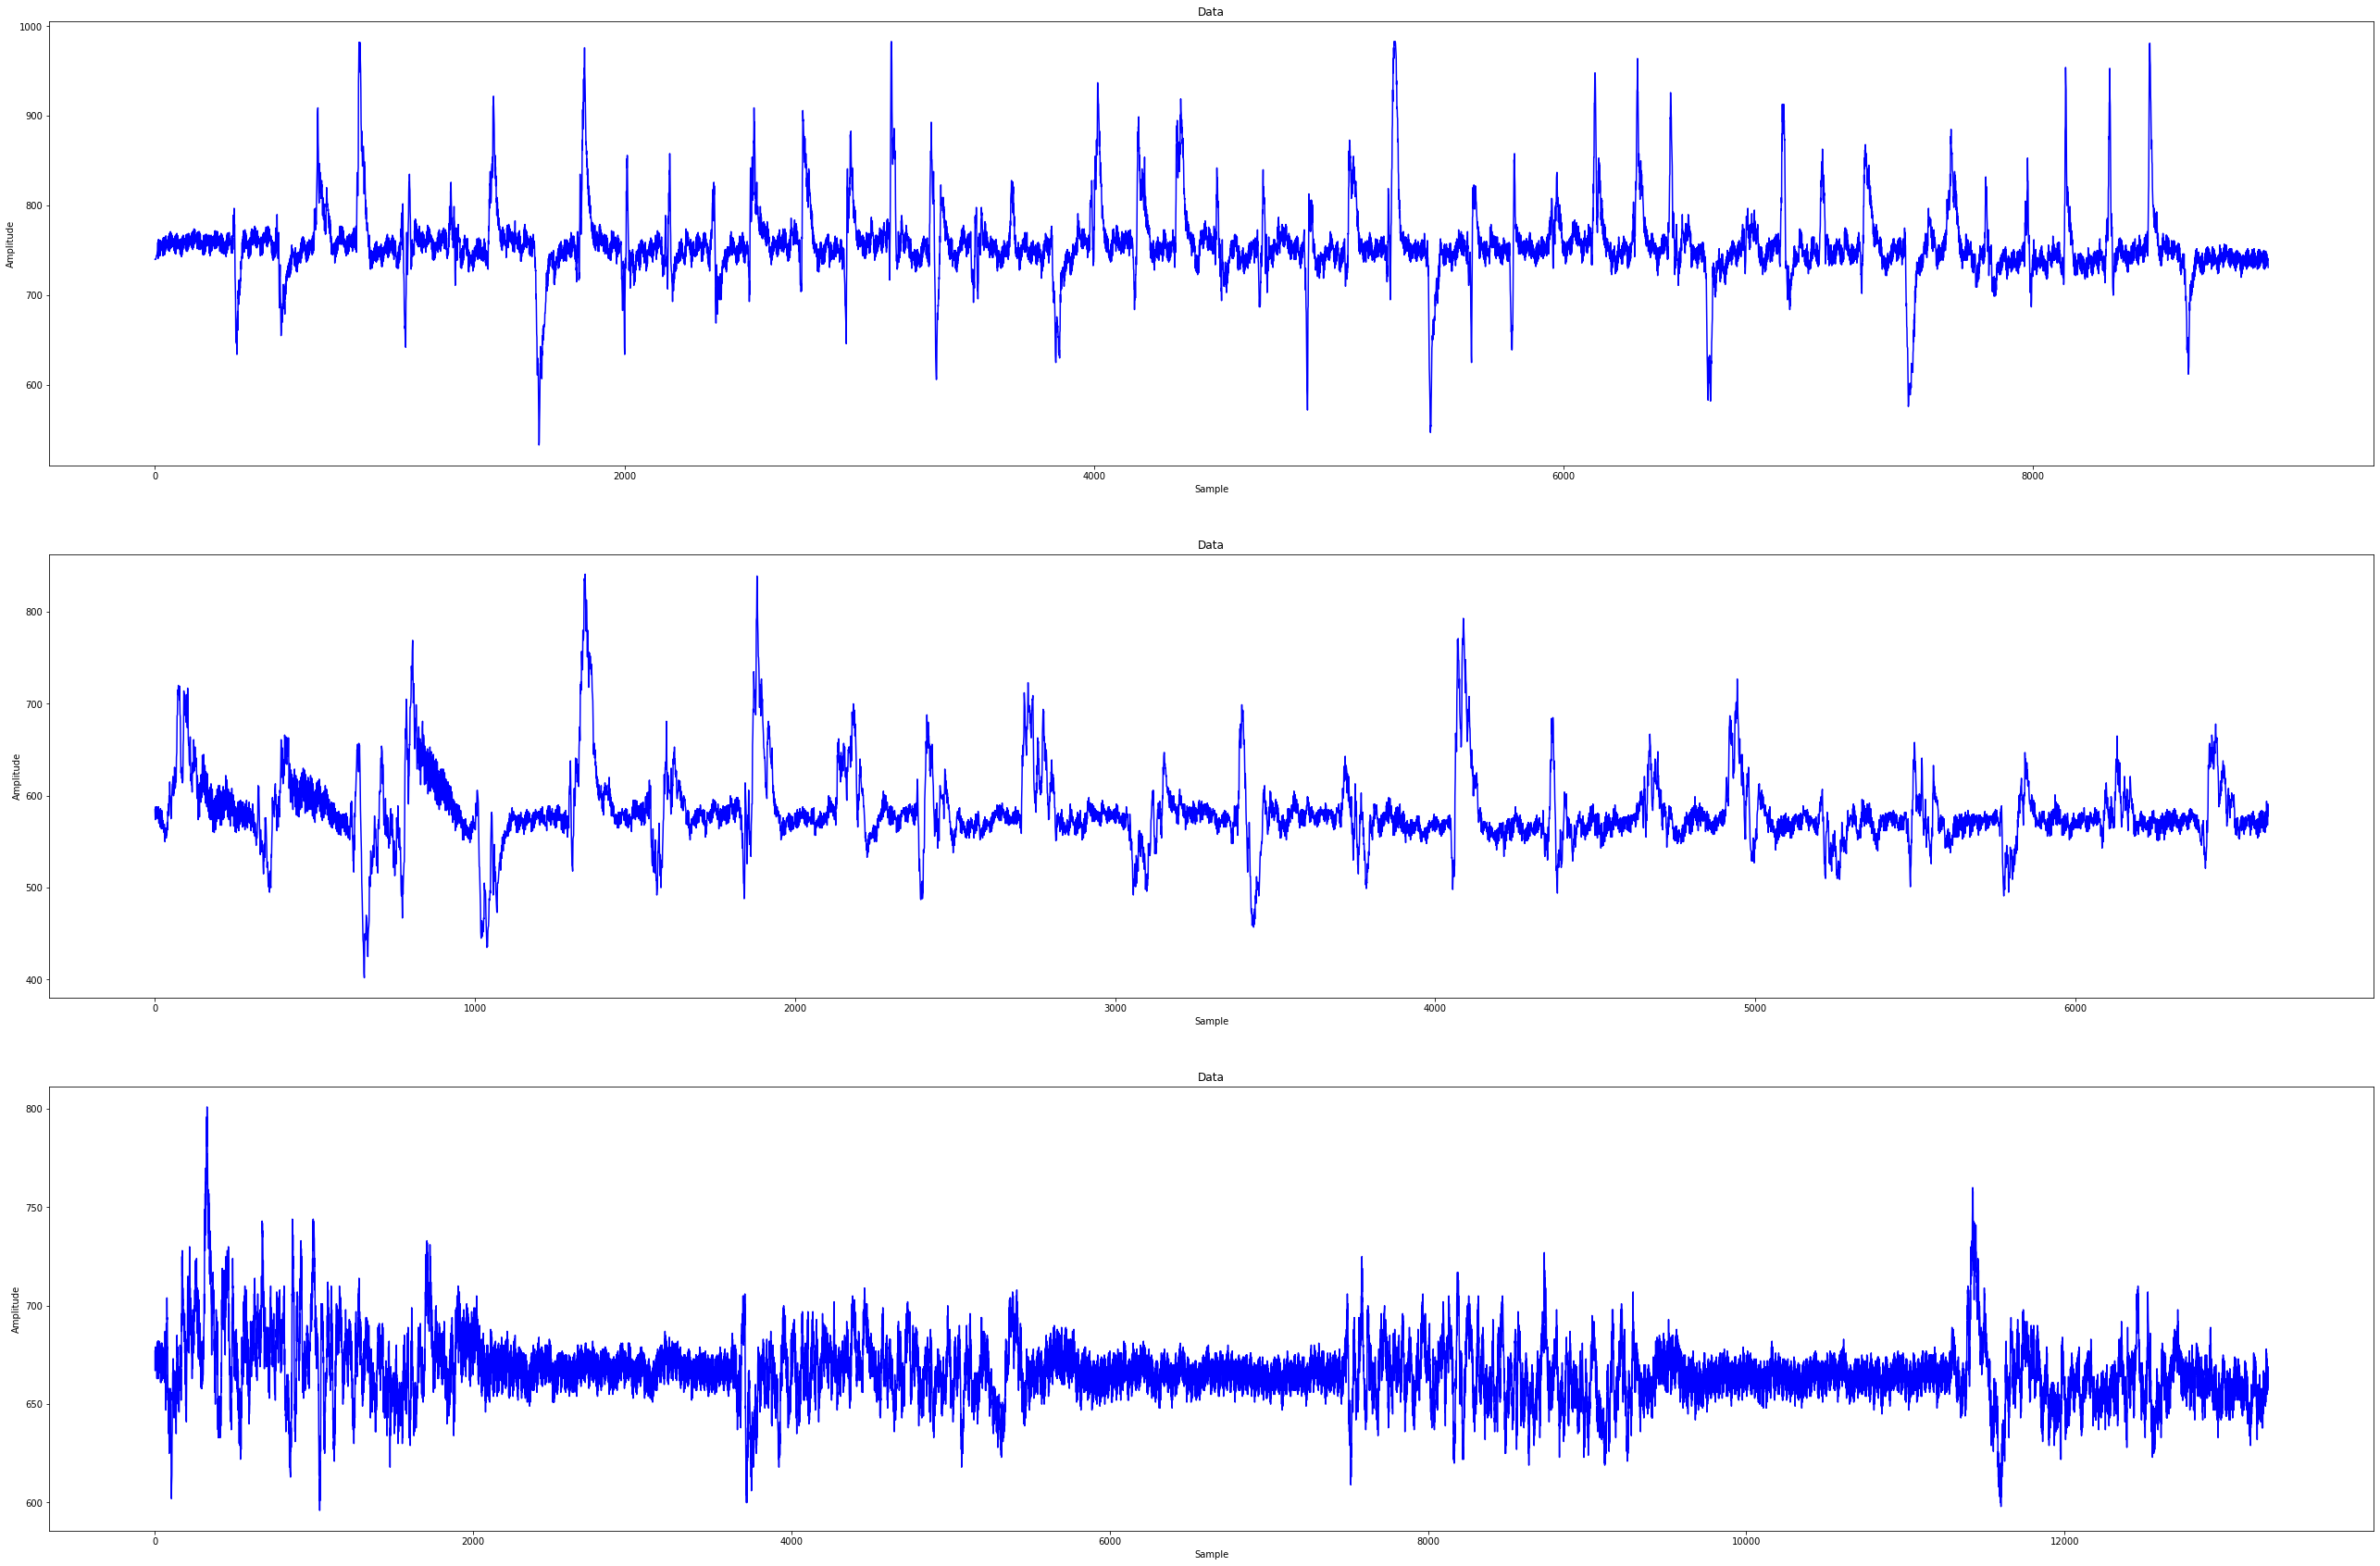

In [22]:
# Plot 
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.subplot(3, 1, 1).set_title('Data')

plt.plot(var_onoff, linestyle='-', color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.subplot(3, 1, 2).set_title('Data')

plt.plot(var_onoff_2, linestyle='-', color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.subplot(3, 1, 3).set_title('Data')

plt.plot(var_sec10, linestyle='-', color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude')


fig.set_size_inches(w=45,h=30)

## Visualizing open & closed hand

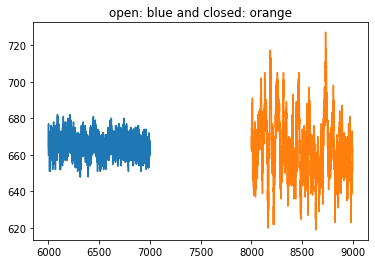

In [23]:
# Take FFT of two parts of 3rd signal (open palm and closed fist):
# 13280 samples in ~70 seconds (~190 Hz)

t_n = 5.27 # Time for these 1000 samples 
N = 1000   # number of samples
T = t_n / N
f_s = 1/T

var_open   =  var_sec10[6000:7000]
var_closed =  var_sec10[8000:9000]
plt.plot(var_open)
plt.plot(var_closed)
plt.title('open: blue and closed: orange')
fval_var_open, fft_var_f_open   = get_fft_values(var_open, T, N, f_s) # FFT
fval_var_close, fft_var_f_close = get_fft_values(var_closed, T, N, f_s) # FFT


## Calculating Fourier transform to check presence and amplitudes of different frequencies, need correction

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


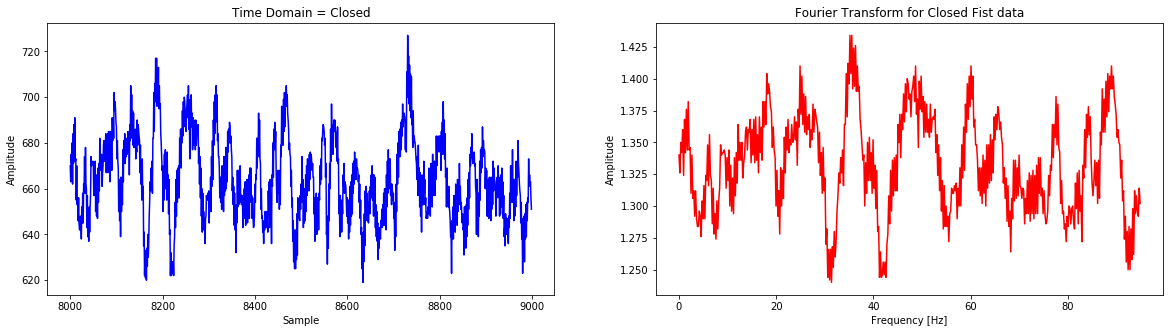

In [24]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Time Domain = Closed')
plt.plot(var_closed, linestyle='-', color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Fourier Transform for Closed Fist data')
plt.plot(fval_var_close, fft_var_f_close, linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') ##

fig.set_size_inches(w=20,h=5)

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


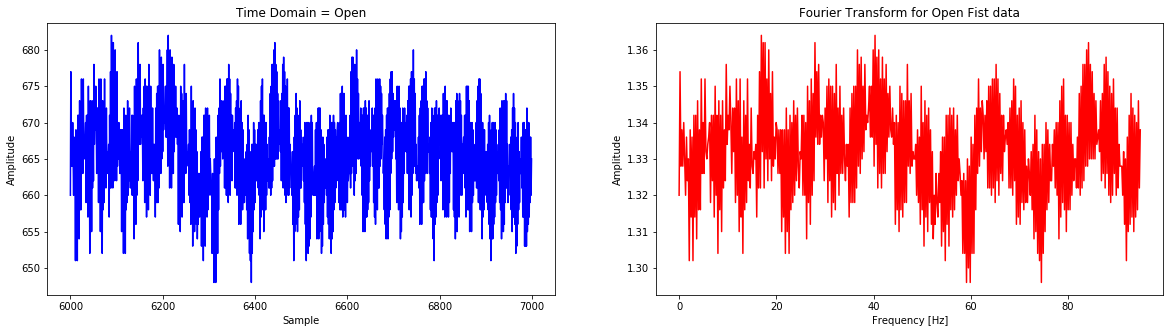

In [25]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Time Domain = Open')
plt.plot(var_open, linestyle='-', color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Fourier Transform for Open Fist data')
plt.plot(fval_var_open, fft_var_f_open, linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') ##

fig.set_size_inches(w=20,h=5)

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


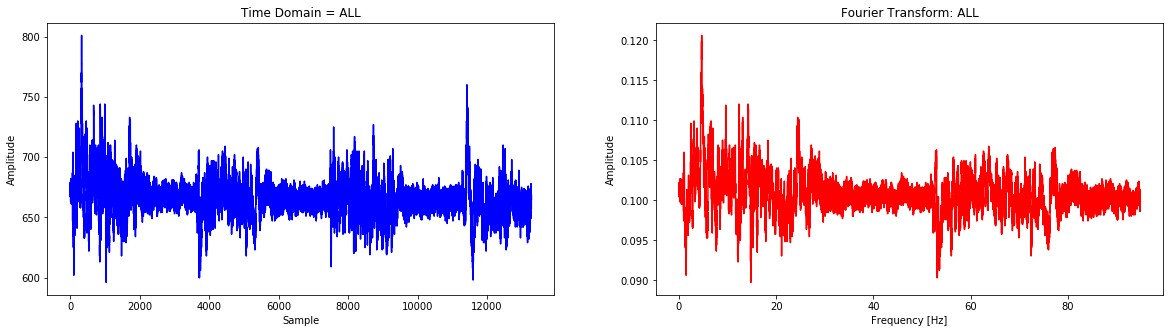

In [26]:
## FT of full signal
t_n = 70 # Time for these all samples 
N = 13281   # number of samples
T = t_n / N
f_s = 1/T

fval_var_all, fft_var_f_all   = get_fft_values(var_sec10, T, N, f_s) # FFT

fig = plt.figure()

plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Time Domain = ALL')
plt.plot(var_sec10, linestyle='-', color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Fourier Transform: ALL')
plt.plot(fval_var_all, fft_var_f_all, linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') ##

fig.set_size_inches(w=20,h=5)

## Calculating means and standard deviations via windowing,
## These will be used as initial features

### Note: mean_all_tmp:   for raw signal
### Note: mean_all_tmp2: for rectified/absolute signal
### Note: mean_all_tmp3: for envelop

In [27]:
window_size = 100
n_windows = (np.size(var_sec10)//window_size)
i=0
j=0
mean_all, mean_all_tmp, mean_all_t = [],[],[]
stdev_all, stdev_tmp, stdev_t = [],[],[]


for i in range(0, n_windows):
    x = var_sec10[ (i*window_size): (i*window_size)+window_size] # mean values
    # standard deviations
    mean_all_tmp.append(np.average(x)) # fill in the averages for windows
    stdev_tmp.append(np.std(x)) # fill in the averages for windows

# Since size of mean_all ≠ size of mean_all_t. Time axis:
for i in range(0, n_windows):
    mean_all_t.append(i*window_size)


Text(0.5, 1.0, 'Cyan: original signal, Blue: Means of 100 sample windows')

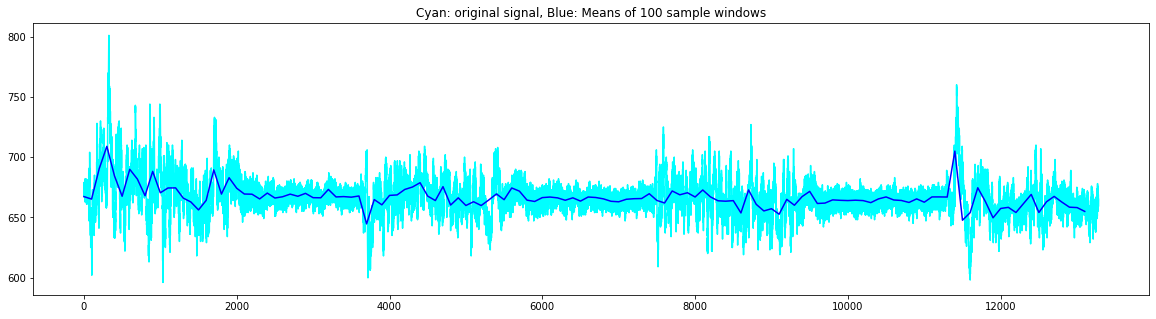

In [28]:
# print(np.size(mean_all_tmp))
# print(np.size(mean_all_t))
# print(np.mean(var_sec10))

# print(np.size(stdev_tmp))
# print(mean_all_tmp)
# print(mean_all_t)

fig_mean = plt.figure()
fig_mean.set_size_inches(w=20,h=5)      
plt.plot(var_sec10, linestyle='-', color='cyan')
plt.plot(mean_all_t, mean_all_tmp,color='blue')
plt.title('Cyan: original signal, Blue: Means of 100 sample windows')

Text(0.5, 1.0, 'Standard deviations for raw signal')

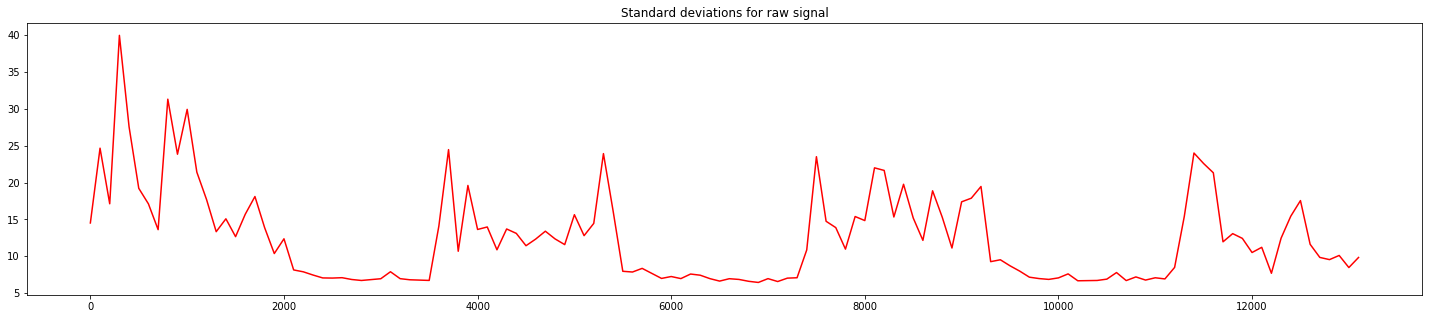

In [29]:

fig_stdev = plt.figure()
plt.plot(mean_all_t, stdev_tmp,color='red')
fig_stdev.set_size_inches(w=25,h=5)
plt.title('Standard deviations for raw signal')

## Rectification and normalization of signal 
## Followed by calculation of features (from the normalized signal)

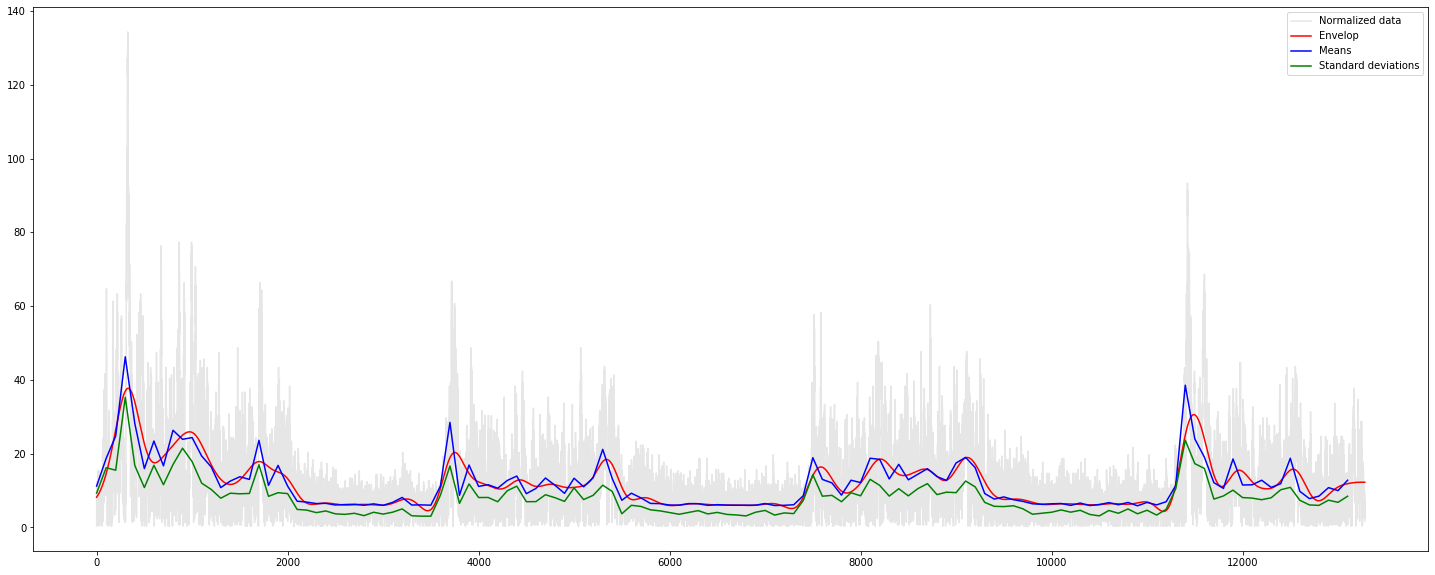

In [30]:
## Rectification

data_temp1 = var_sec10 - np.mean(var_sec10)
data_norm = abs(data_temp1)


data_norm_np = data_norm.to_numpy()
data_norm_np = data_norm_np.reshape((np.size(data_norm_np),))
low_pass = 1
low_pass = low_pass/f_s
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')

#############################################################################################
emg_envelope_sig = sp.signal.filtfilt(b2, a2, x = data_norm_np)
#############################################################################################

## NOW CALCULATE MEANS and VARIANCES 
window_size2 = 100
n_windows2 = (np.size(data_norm_np)//window_size2)
mean_all2, mean_all_tmp2, mean_all_t2 = [],[],[]
stdev_all2, stdev_tmp2, stdev_t2 = [],[],[]

for i in range(0, n_windows2):
    x2 = data_norm_np[ (i*window_size2): (i*window_size2)+window_size2] # mean values
    # standard deviations
    mean_all_tmp2.append(np.average(x2)) # fill in the averages for windows
    stdev_tmp2.append(np.std(x2)) # fill in the averages for windows

# Since size of mean_all ≠ size of mean_all_t. Time axis:
for i in range(0, n_windows2):
    mean_all_t2.append(i*window_size2)


# PLOT    
fig_stdev = plt.figure()
fig_stdev.set_size_inches(w=25,h=10)
plt.plot(data_norm_np, color='0.9',label='Normalized data')
plt.plot(emg_envelope_sig, color='r',label='Envelop')
plt.plot(mean_all_t2, mean_all_tmp2, color='b',label='Means')
plt.plot(mean_all_t2, stdev_tmp2, color='g',label='Standard deviations')
plt.legend();


## data_norm_np is grey


### CALCULATING MEANS AND STD DEV OF ENVELOP (3)

13281


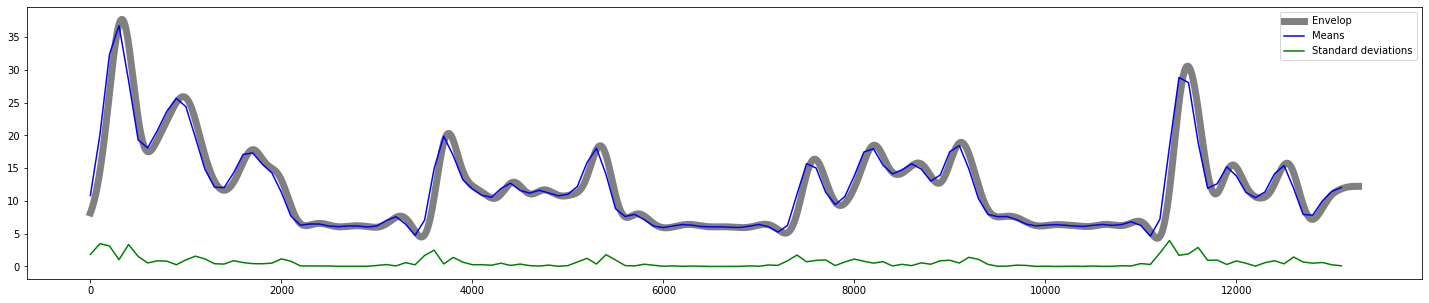

In [31]:
print(np.size(emg_envelope_sig))

## NOW CALCULATE MEANS and VARIANCES 
window_size3 = 100
n_windows3 = (np.size(emg_envelope_sig)//window_size3)
mean_all3, mean_all_tmp3, mean_all_t3 = [],[],[]
stdev_all3, stdev_tmp3, stdev_t3 = [],[],[]

for i in range(0, n_windows3):
    x3 = emg_envelope_sig[ (i*window_size3): (i*window_size3)+window_size3] # mean values
    # standard deviations
    mean_all_tmp3.append(np.average(x3)) # fill in the averages for windows
    stdev_tmp3.append(np.std(x3)) # fill in the averages for windows

# Since size of mean_all ≠ size of mean_all_t. Time axis:
for i in range(0, n_windows3):
    mean_all_t3.append(i*window_size3)
    
# PLOT    
fig_stdev = plt.figure()
fig_stdev.set_size_inches(w=25,h=5)   
plt.plot(emg_envelope_sig, color='0.5',label='Envelop',linewidth=7.0)
plt.plot(mean_all_t3, mean_all_tmp3, color='b',label='Means')
plt.plot(mean_all_t3, stdev_tmp3, color='g',label='Standard deviations')
plt.legend()


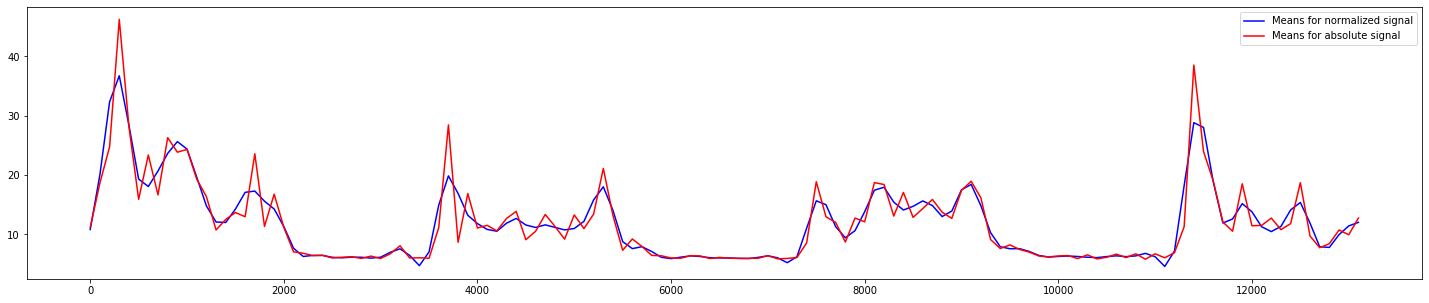

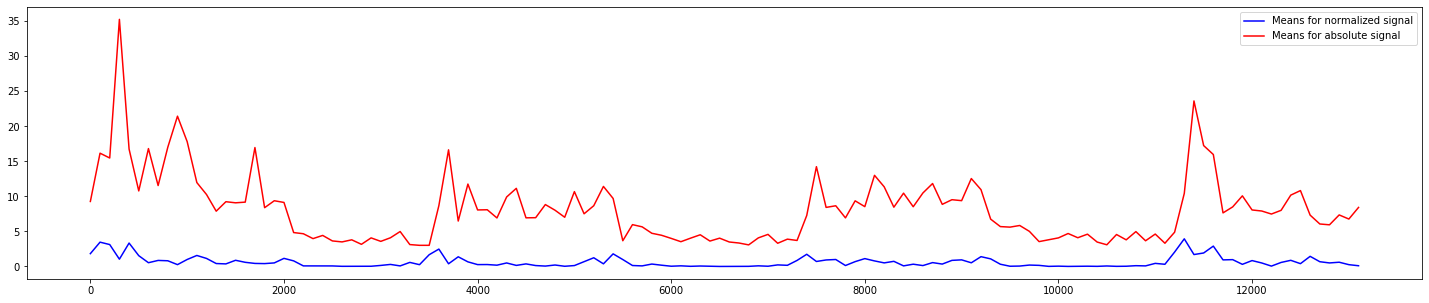

In [32]:
# PLOT prev and new means and dev

fig_stdev = plt.figure()
fig_stdev.set_size_inches(w=25,h=5)   
plt.plot(mean_all_t3, mean_all_tmp3, color='b',label='Means for normalized signal')
plt.plot(mean_all_t2, mean_all_tmp2, color='r',label='Means for absolute signal')
plt.legend()

fig_stdev2 = plt.figure()
fig_stdev2.set_size_inches(w=25,h=5)   
plt.plot(mean_all_t3, stdev_tmp3, color='b',label='Means for normalized signal')
plt.plot(mean_all_t2, stdev_tmp2, color='r',label='Means for absolute signal')
plt.legend()


In [33]:
## [-,-,-,-,- ....... ,-,-,-] Current mean_all_tmp and stdev_tmp sizes: 132
## [1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,1....] 132/7 ≈ 19 ---> 19 ones followed by 19 zeros and so on

x = 7 #  total number of contractions & relaxations in the series
mask_1 = np.full( (n_windows//x)+1, 1 )
mask_0 = np.full( (n_windows//x)+1, 0 )
class_binary = []

print (((np.size(mean_all_tmp))//(np.size(mask_1)))//2)
for i in range ( 0, ( ((np.size(mean_all_tmp))//(np.size(mask_1)))//2) ):
    class_binary.append(mask_0)
    class_binary.append(mask_1)

class_binary.append(mask_0)
class_binary = np.reshape(class_binary,np.size(class_binary), order='A')
class_binary = np.resize(class_binary, class_binary.size-1) # np.delete(class_binary, (-1))
print(np.shape(class_binary))

# plt.plot(mean_all_tmp, stdev_tmp, '>', color='black')


3
(132,)


(2, 132)
(2, 132)
(2, 132)
Pink: open, Blue: Closed


/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments a

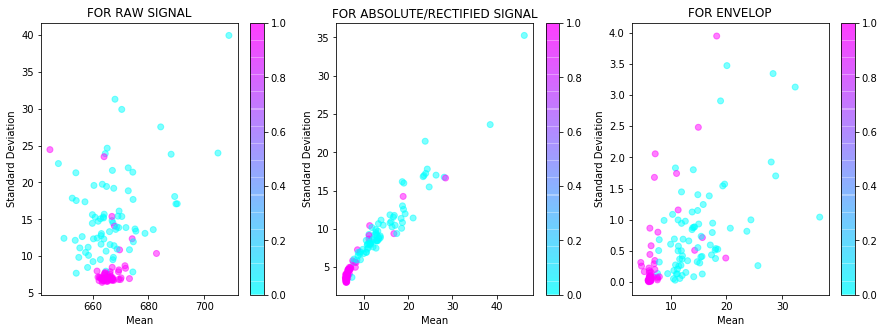

In [34]:
import matplotlib.cm as cm

mean_all_tmp_reshaped = (np.reshape(mean_all_tmp, (1,np.size(mean_all_tmp))))
stdev_tmp_reshaped    = (np.reshape(stdev_tmp, (1,np.size(mean_all_tmp))))
features_mean_stddev = np.vstack((mean_all_tmp_reshaped, stdev_tmp_reshaped))
print(np.shape(features_mean_stddev))

mean_all_tmp_reshaped2 = (np.reshape(mean_all_tmp2, (1,np.size(mean_all_tmp2))))
stdev_tmp_reshaped2    = (np.reshape(stdev_tmp2, (1,np.size(mean_all_tmp2))))
features_mean_stddev2 = np.vstack((mean_all_tmp_reshaped2, stdev_tmp_reshaped2))
print(np.shape(features_mean_stddev2))

mean_all_tmp_reshaped3 = (np.reshape(mean_all_tmp3, (1,np.size(mean_all_tmp3))))
stdev_tmp_reshaped3    = (np.reshape(stdev_tmp3, (1,np.size(mean_all_tmp3))))
features_mean_stddev3 = np.vstack((mean_all_tmp_reshaped3, stdev_tmp_reshaped3))
print(np.shape(features_mean_stddev3))


# from sklearn.datasets import load_iris
# iris = load_iris()
# features = iris.data.T
# print(features.shape)
# feature[0] : -,-,-,-,-,-,-, .... -,-,-,-,-,-,-
# feature[1] : -,-,-,-,-,-,-, .... -,-,-,-,-,-,-
# feature[2] : -,-,-,-,-,-,-, .... -,-,-,-,-,-,-
# feature[3] : -,-,-,-,-,-,-, .... -,-,-,-,-,-,-

fig = plt.figure()
fig.set_size_inches(w=15,h=5)

plt.subplot(1, 3, 1)
plt.subplot(1, 3, 1).set_title('FOR RAW SIGNAL')
plt.scatter(features_mean_stddev[0], features_mean_stddev[1], c = class_binary, alpha=0.5, cmap = cm.cool) #s=10
plt.colorbar() # 0 is for clenched state, 1 is for openn state
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')

plt.subplot(1, 3, 2)
plt.subplot(1, 3, 2).set_title('FOR ABSOLUTE/RECTIFIED SIGNAL')
plt.scatter(features_mean_stddev2[0], features_mean_stddev2[1], c = class_binary, alpha=0.5, cmap = cm.cool) #s=10
plt.colorbar() # 0 is for clenched state, 1 is for openn state
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')

plt.subplot(1, 3, 3)
plt.subplot(1, 3, 3).set_title('FOR ENVELOP')
plt.scatter(features_mean_stddev3[0], features_mean_stddev3[1], c = class_binary, alpha=0.5, cmap = cm.cool) #s=10
plt.colorbar() # 0 is for clenched state, 1 is for openn state
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')

print('Pink: open, Blue: Closed')

# print(np.shape(x))

In [35]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

# df = np.vstack((features_mean_stddev, class_binary))
# df = df.T
### Col1-Means, Col2-Devs, class (0/1)
## -, -, c
## -, -, c
## -, -, c
## .....
## -, -, c


var_onoff_u = pd.read_csv(r"/Users/utkarshtripathi/Documents/PlatformIO/Projects/Data_Collected/onoff_u.csv")
var_onoff_2_u = pd.read_csv(r"/Users/utkarshtripathi/Documents/PlatformIO/Projects/Data_Collected/onoff2_u.csv")
var_sec10_u = pd.read_csv(r"/Users/utkarshtripathi/Documents/PlatformIO/Projects/Data_Collected/sec10_u.csv")


# mean_all_tmp_propCol = list(mean_all_tmp)
mean_all_tmp_propCol = (mean_all_tmp)
# mean_all_tmp_propCol.insert(0, 'Mean')
print(np.shape(mean_all_tmp_propCol))

stdev_tmp_propCol = (stdev_tmp)
# stdev_tmp_propCol = list(stdev_tmp)
# stdev_tmp_propCol.insert(0, 'Std_dev')
print(np.shape(stdev_tmp_propCol))

# class_binary_propCol = list(class_binary)
class_binary_propCol = (class_binary)
# class_binary_propCol.insert(0, 'Class')
print(np.shape(class_binary_propCol))

# print(mean_all_tmp_propCol)
# print(stdev_tmp_propCol)
# print(class_binary_propCol)

## Now stack and make a list of properties and classes -> 'full'
full_1 = np.vstack((mean_all_tmp_propCol ,stdev_tmp_propCol))
full_2 = np.vstack((full_1 ,class_binary_propCol))

properties = list(full_1.T)
print(np.shape(properties))
print(type(properties)) # LIST

train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.3, random_state=0)

X = properties
y = class_binary_propCol
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)


print('X (Properties) shape',np.shape(X))
print('y (classe_binary_propCol) shape',np.shape(y))
print('train_data shape',np.shape(train_data))
print('train_label shape',np.shape(train_label))
print('test_data shape',np.shape(test_data))
print('test_label shape',np.shape(test_label))

train_label = np.asarray(train_label)
test_label  = np.asarray(test_label)

print(type(train_label))
print(type(train_label))

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

model.fit( train_data, train_label, epochs=50, batch_size=1 )
test_loss, test_acc = model.evaluate( test_data, test_label )


Instructions for updating:
non-resource variables are not supported in the long term
(132,)
(132, 1)
(132,)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 132 and the array at index 1 has size 1

In [ ]:
# print(np.size(data_norm))